## Import Libraries
for Exploratory Data Analysis (EDA) only.
👉 Goal = understand dataset before segmentation/forecasting.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-v0_8")


## Load Dataset


In [6]:
# Load the dataset
data = pd.read_csv("../data/OnlineRetailDataSet.csv", encoding="utf-8-sig", parse_dates=["InvoiceDate"])
data.head()




,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
data.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## Dataset Overview

In [8]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000

In [9]:
#Missing Values Check

data.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Sales Over Time

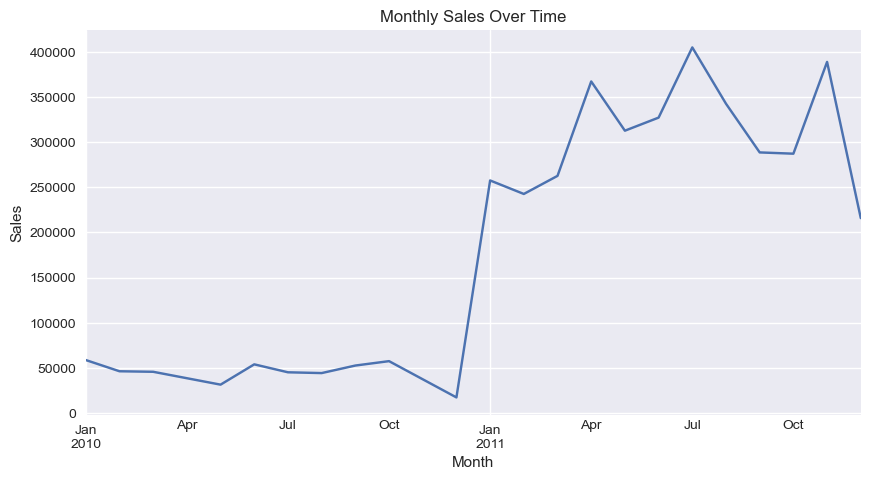

In [11]:
# Add TotalPrice column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Ensure InvoiceDate is datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')


# Aggregate sales by month
monthly_sales = data.groupby(data['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()

monthly_sales.plot(kind='line', figsize=(10,5))
plt.title("Monthly Sales Over Time")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.savefig("../visuals/monthly_sales.png", dpi=150)
plt.show()
